# Importing Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-linux_x86_64.whl size=2054423 sha256=e1d667ff095156bc0bc02c52704f0d347584b53b8d49e22cec42b9a897512408
  Stored in directory: /root/.cache/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


In [ ]:
import wave
import os
from scipy.io import wavfile

Filename: '/content/drive/MyDrive/prior dataset/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav'
Sample Rate: 8000 Hz
  - Channels: 1
  - Bit Depth: 32-bit
  - Duration: 3.74 seconds
  - Total Samples: 29911


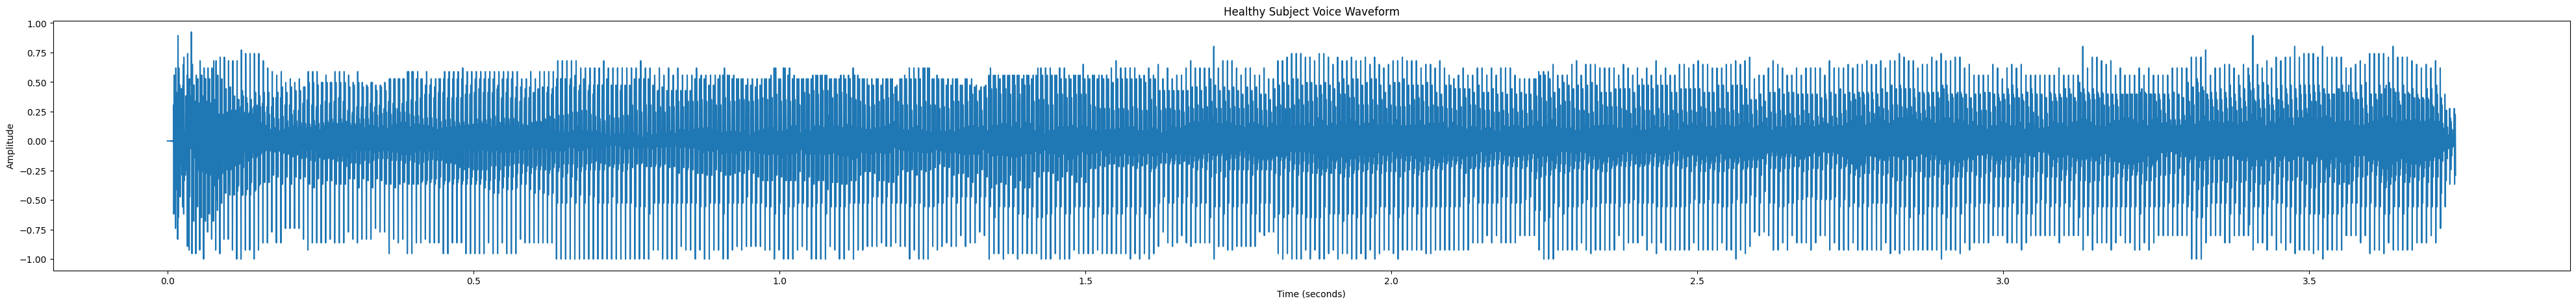

In [ ]:
filename = "/content/drive/MyDrive/prior dataset/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav"

try:
    sample_rate, data = wavfile.read(filename)

    print(f"Filename: '{filename}'")
    print(f"Sample Rate: {sample_rate} Hz")

    if data.ndim > 1:
        channels = data.shape[1]
    else:
        channels = 1
    print(f"  - Channels: {channels}")

    bit_depth = data.dtype.itemsize * 8
    print(f"  - Bit Depth: {bit_depth}-bit")

    duration = len(data) / float(sample_rate)
    print(f"  - Duration: {duration:.2f} seconds")
    print(f"  - Total Samples: {len(data)}")

    time = np.linspace(0., duration, num=len(data))

    if channels > 1:
        audio_to_plot = data[:, 0]
    else:
        audio_to_plot = data

    plt.figure(figsize=(50, 5))
    plt.plot(time, audio_to_plot)

    plt.title("Healthy Subject Voice Waveform")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (seconds)")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

Filename: '/content/drive/MyDrive/prior dataset/PD_AH/AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav'
Sample Rate: 8000 Hz
  - Channels: 1
  - Bit Depth: 32-bit
  - Duration: 5.49 seconds
  - Total Samples: 43903


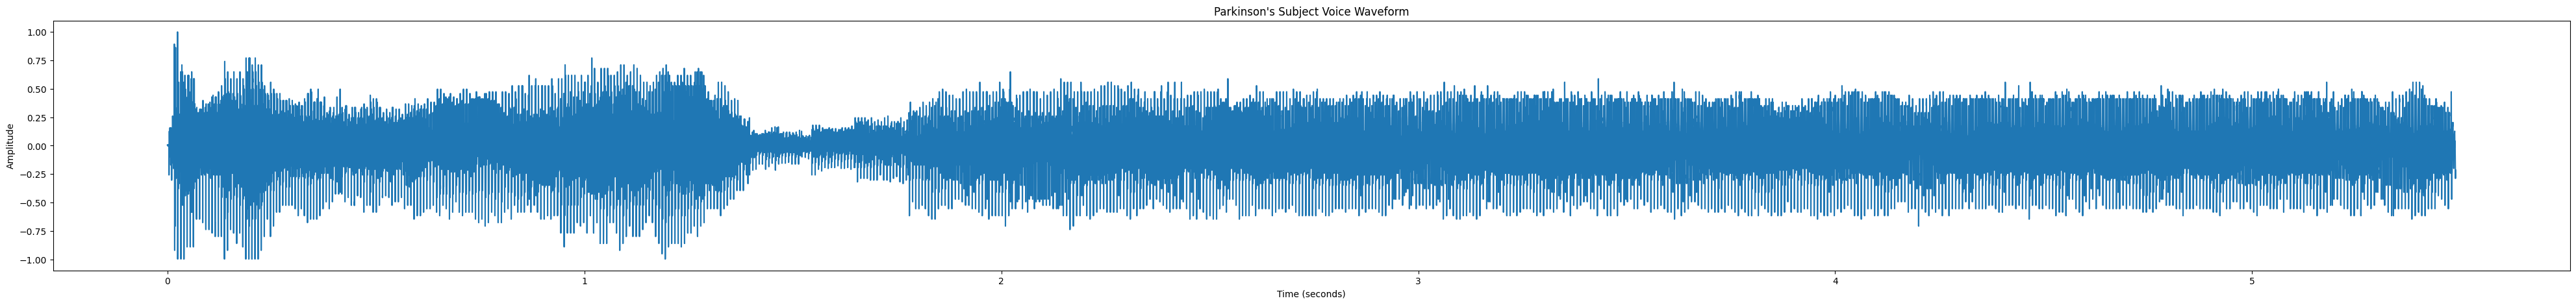

In [ ]:
filename = "/content/drive/MyDrive/prior dataset/PD_AH/AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav"

try:
    sample_rate, data = wavfile.read(filename)

    print(f"Filename: '{filename}'")
    print(f"Sample Rate: {sample_rate} Hz")

    if data.ndim > 1:
        channels = data.shape[1]
    else:
        channels = 1
    print(f"  - Channels: {channels}")

    bit_depth = data.dtype.itemsize * 8
    print(f"  - Bit Depth: {bit_depth}-bit")

    duration = len(data) / float(sample_rate)
    print(f"  - Duration: {duration:.2f} seconds")
    print(f"  - Total Samples: {len(data)}")

    time = np.linspace(0., duration, num=len(data))

    if channels > 1:
        audio_to_plot = data[:, 0]
    else:
        audio_to_plot = data

    plt.figure(figsize=(50, 5))
    plt.plot(time, audio_to_plot)

    plt.title("Parkinson's Subject Voice Waveform")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (seconds)")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import librosa

In [ ]:
base_path = "/content/drive/MyDrive/prior dataset/"
folders_to_check = [
    os.path.join(base_path, "HC_AH"),
    os.path.join(base_path, "PD_AH")
]

files_outside_range = []
total_files_checked = 0
total_errors = 0

for folder_path in folders_to_check:
    print(f"\nCurrent folder: {os.path.basename(folder_path)}")

    if not os.path.isdir(folder_path):
        print(f"Folder not found.")
        continue
    try:
        filenames = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"Could not access folder.")
        continue

    wav_files = [f for f in filenames if f.lower().endswith('.wav')]

    if not wav_files:
        print("No .wav files found in this folder.")
        continue

    for filename in wav_files:
        file_path = os.path.join(folder_path, filename)
        total_files_checked += 1

        try:
            y, sr = librosa.load(file_path, sr=None)

            if y.size == 0:
                print(f"{filename} is empty.")
                continue

            min_val = np.min(y)
            max_val = np.max(y)

            if not (-1.0 <= min_val and max_val <= 1.0):
                problem_file = {
                    'path': file_path,
                    'min': min_val,
                    'max': max_val,
                    'reason': 'Amplitude out of [-1, 1] range'
                }
                files_outside_range.append(problem_file)

        except Exception as e:
            total_errors += 1
            error_file = {
                'path': file_path,
                'reason': f"Error loading file: {e}"
            }
            files_outside_range.append(error_file)

print(f"Total .wav files scanned: {total_files_checked}")

if not files_outside_range:
    print("\nAll scanned files have amplitudes within the [-1.0, 1.0] range.")
else:
    num_problems = len(files_outside_range)
    print(f"\n{num_problems} file(s) are outside the [-1.0, 1.0] range:")
    print("-" * 30)
    for info in files_outside_range:
        if 'min' in info:
            print(f"File: {os.path.basename(info['path'])}")
            print(f"Reason: {info['reason']}")
            print(f"Min Amplitude: {info['min']:.4f}")
            print(f"Max Amplitude: {info['max']:.4f}\n")
        else:
            print(f"File: {os.path.basename(info['path'])}")
            print(f"Reason: {info['reason']}\n")

print(f"Total files with issues: {len(files_outside_range)}")


Current folder: HC_AH

Current folder: PD_AH
Total .wav files scanned: 81

All scanned files have amplitudes within the [-1.0, 1.0] range.
Total files with issues: 0


In [ ]:
!pip install openpyxl

In [ ]:
dem_metadata = pd.read_excel("/content/drive/MyDrive/prior dataset/Demographics_age_sex.xlsx")
display(dem_metadata.head())

,Sample ID,Label,Age,Sex
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,69.0,M
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,43.0,M
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,18.0,F
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,HC,28.0,M
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,HC,68.0,M


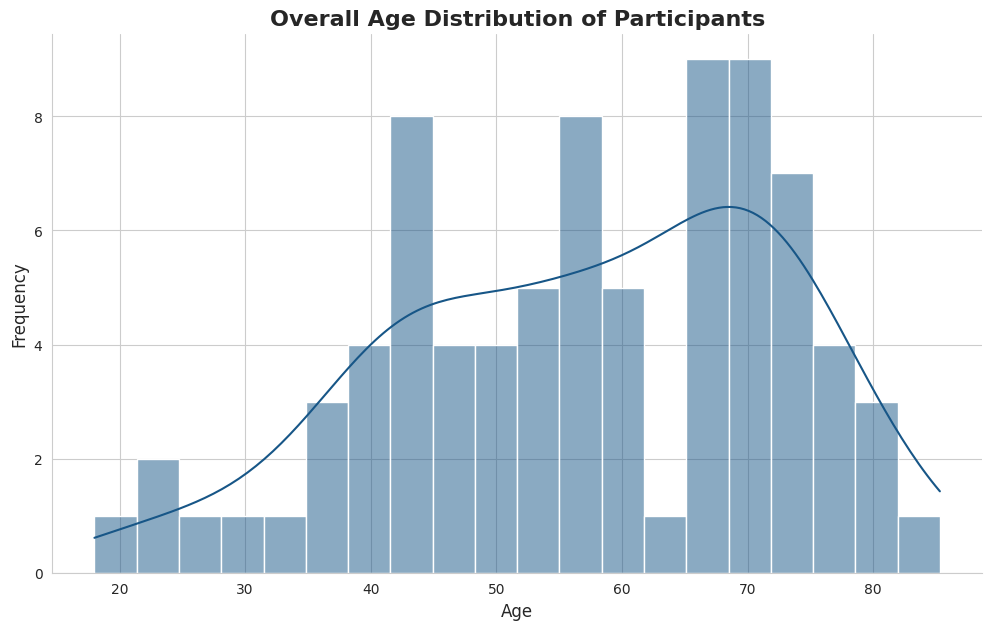

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(
    data=dem_metadata,
    x='Age',
    kde=True,
    bins=20,
    color='#175687',
    edgecolor=None
)

plt.title('Overall Age Distribution of Participants', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sns.despine()
plt.show()

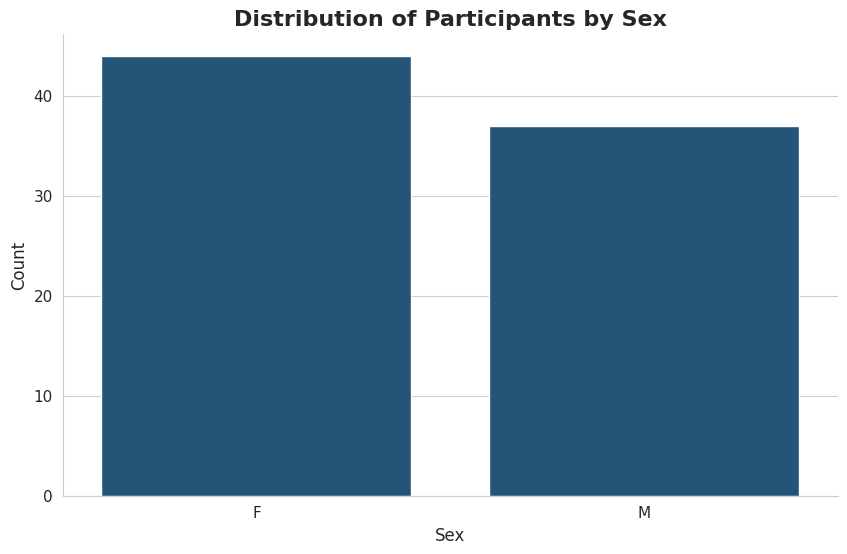

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=dem_metadata,
    x='Sex',
    color='#175687',
    order=dem_metadata['Sex'].value_counts().index
)

for patch in ax.patches:
    patch.set_edgecolor(None)

plt.title('Distribution of Participants by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

sns.despine()
plt.show()

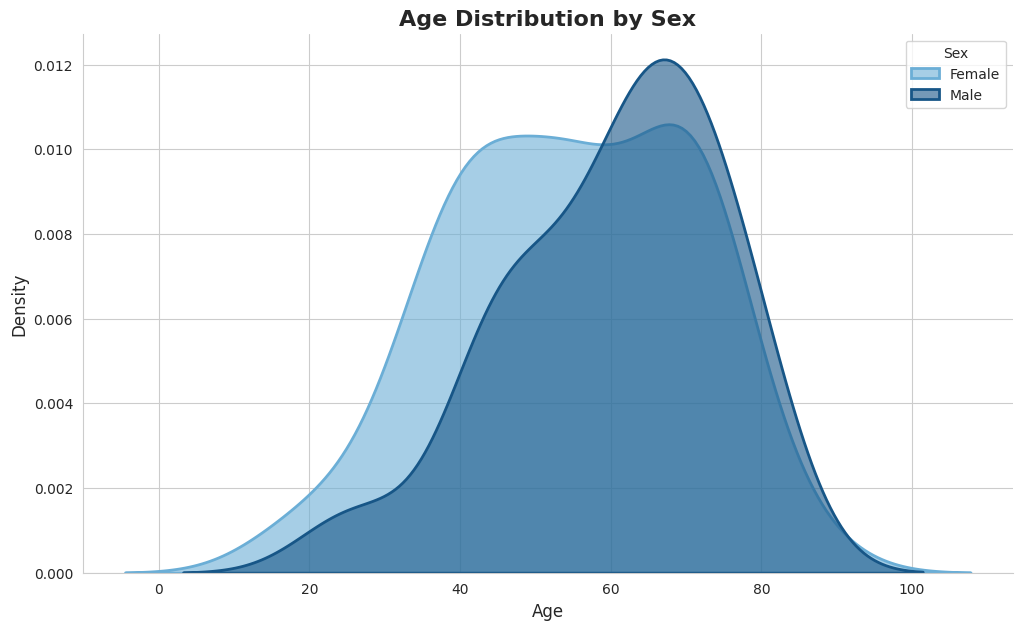

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

palette = {'M': '#175687', 'F': '#6baed6'}

sns.kdeplot(
    data=dem_metadata,
    x='Age',
    hue='Sex',
    fill=True,
    palette=palette,
    alpha=0.6,
    linewidth=2
)

plt.title('Age Distribution by Sex', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sex', labels=['Female', 'Male'])
sns.despine()
plt.show()

In [ ]:
dem_metadata.describe()

,Age
count,81.000000
mean,57.264198
std,15.371786
min,18.000000
25%,44.000000
50%,58.140000
75%,69.450000
max,85.310000


# Acoustic Signal Features

In [ ]:
pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.1 MB/s eta 0:00:00


In [ ]:
import parselmouth
from parselmouth.praat import call
from tqdm.notebook import tqdm
import glob

In [ ]:
def extract_acoustic_features(voice_file_path):
    try:
        sound = parselmouth.Sound(voice_file_path)
    except Exception as e:
        print(f"Could not read file {voice_file_path}: {e}")
        return None

    f0_min, f0_max = 75, 500

    pitch = call(sound, "To Pitch", 0.0, f0_min, f0_max)
    mean_f0 = call(pitch, "Get mean", 0, 0, "Hertz")
    stdev_f0 = call(pitch, "Get standard deviation", 0, 0, "Hertz")

    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)

    point_process = call(sound, "To PointProcess (periodic, cc)", f0_min, f0_max)

    local_jitter = call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    local_absolute_jitter = call(point_process, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rap_jitter = call(point_process, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5_jitter = call(point_process, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddp_jitter = call(point_process, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)

    local_shimmer = call([sound, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    local_db_shimmer = call([sound, point_process], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3_shimmer = call([sound, point_process], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq5_shimmer = call([sound, point_process], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11_shimmer = call([sound, point_process], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    dda_shimmer = call([sound, point_process], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

    formants = call(sound, "To Formant (burg)", 0.0, 5, 5500, 0.025, 50)
    num_points = call(point_process, "Get number of points")

    f1_list, f2_list, f3_list, f4_list = [], [], [], []

    for point in range(1, num_points + 1):
        t = call(point_process, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')

        if not np.isnan(f1): f1_list.append(f1)
        if not np.isnan(f2): f2_list.append(f2)
        if not np.isnan(f3): f3_list.append(f3)
        if not np.isnan(f4): f4_list.append(f4)

    def get_stats(lst):
        return (np.mean(lst), np.std(lst)) if lst else (0, 0)

    f1_mean, f1_std = get_stats(f1_list)
    f2_mean, f2_std = get_stats(f2_list)
    f3_mean, f3_std = get_stats(f3_list)
    f4_mean, f4_std = get_stats(f4_list)

    feature_dict = {
        'mean_F0': mean_f0,
        'stdev_F0': stdev_f0,
        'HNR': hnr,
        'local_jitter': local_jitter,
        'local_absolute_jitter': local_absolute_jitter,
        'rap_jitter': rap_jitter,
        'ppq5_jitter': ppq5_jitter,
        'ddp_jitter': ddp_jitter,
        'local_shimmer': local_shimmer,
        'local_db_shimmer': local_db_shimmer,
        'apq3_shimmer': apq3_shimmer,
        'apq5_shimmer': apq5_shimmer,
        'apq11_shimmer': apq11_shimmer,
        'dda_shimmer': dda_shimmer,
        'f1_mean': f1_mean,
        'f1_stdev': f1_std,
        'f2_mean': f2_mean,
        'f2_stdev': f2_std,
        'f3_mean': f3_mean,
        'f3_stdev': f3_std,
        'f4_mean': f4_mean,
        'f4_stdev': f4_std,
    }

    return feature_dict

In [ ]:
folders_to_process = {
    "HC_AH": "HC",
    "PD_AH": "PD"
}

all_features_list = []

for folder_name, status_label in folders_to_process.items():
    current_folder_path = os.path.join(base_path, folder_name)

    wav_files = glob.glob(os.path.join(current_folder_path, "*.wav"))

    print(f"Processing {len(wav_files)} files in folder: {folder_name}")

    for file_path in tqdm(wav_files, desc=f"Status: {status_label}"):
        patient_id = os.path.splitext(os.path.basename(file_path))[0]

        features = extract_acoustic_features(file_path)

        if features:
            features['patient_id'] = patient_id
            features['status'] = status_label
            all_features_list.append(features)

print("\nFeature extraction complete.")

if not all_features_list:
    print("No data was processed.")
else:
    df = pd.DataFrame(all_features_list)

    feature_cols = [col for col in df.columns if col not in ['patient_id', 'status']]
    ordered_cols = ['patient_id', 'status'] + feature_cols
    df = df[ordered_cols]

    output_path = os.path.join(base_path, "acoustic_features_dataset.csv")
    df.to_csv(output_path, index=False)

    print(f"\nDataFrame created with {len(df)} records and {len(df.columns)} columns.")
    print(f"Dataset saved to: {output_path}")

    display(df.head(-20))

Processing 41 files in folder: HC_AH


Status: HC:   0%|          | 0/41 [00:00<?, ?it/s]

Processing 40 files in folder: PD_AH


Status: PD:   0%|          | 0/40 [00:00<?, ?it/s]


Feature extraction complete.

DataFrame created with 81 records and 24 columns.
Dataset saved to: /content/drive/MyDrive/prior dataset/acoustic_features_dataset.csv


,patient_id,status,mean_F0,stdev_F0,HNR,local_jitter,local_absolute_jitter,rap_jitter,ppq5_jitter,ddp_jitter,...,apq11_shimmer,dda_shimmer,f1_mean,f1_stdev,f2_mean,f2_stdev,f3_mean,f3_stdev,f4_mean,f4_stdev
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,132.013700,3.558746,20.302154,0.004138,0.000031,0.002028,0.002163,0.006083,...,0.033093,0.065916,693.614662,7.879763,1192.724216,28.353503,2180.308032,91.016067,3172.156938,95.357778
1,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,234.250782,2.101888,23.147986,0.004685,0.000020,0.002691,0.002680,0.008074,...,0.043938,0.079168,642.024808,83.912933,1054.651176,90.046893,1683.024955,228.927952,2878.726902,114.961685
2,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,110.528109,3.010804,15.323075,0.005911,0.000053,0.003164,0.003722,0.009493,...,0.081274,0.139993,638.855345,49.749341,1143.759871,64.534089,2064.418927,174.205516,2799.676916,152.107240
3,AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F,HC,89.797080,10.673463,11.981723,0.007850,0.000087,0.003806,0.003983,0.011417,...,0.112311,0.152703,662.501107,111.163893,1067.509397,58.266301,2113.426616,302.062644,2896.796893,113.453002
4,AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3,HC,188.442695,2.145909,22.011163,0.002106,0.000011,0.001047,0.001105,0.003142,...,0.034093,0.056471,892.112053,60.636493,1334.017663,27.535952,2173.195178,212.918801,3049.786610,123.169632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,AH_545743929-E2EAE1A3-7E46-4DCF-8DB7-37A5CA47DB9D,PD,136.368808,3.580154,12.690913,0.008118,0.000060,0.004264,0.004568,0.012791,...,0.077134,0.157003,535.428532,91.557376,1099.671066,46.322472,2462.062739,191.851205,2943.038667,156.880850
57,AH_545713223-E6D59EE5-4C3F-4B40-AE8F-0657EF94DB66,PD,202.418257,4.028076,21.846484,0.003272,0.000016,0.001604,0.001702,0.004813,...,0.034516,0.056517,756.622586,84.223979,1177.100904,102.858278,1800.889695,182.274595,3055.909396,75.317948
58,AH_545789668-A4F6069C-5E1A-49F5-9EDC-59C6EB833E42,PD,167.521574,64.710783,17.722819,0.014310,0.000086,0.007719,0.008210,0.023157,...,0.052053,0.106809,789.327253,130.119562,1177.501804,95.923538,2211.474745,165.381997,3138.031987,150.798901
59,AH_545753014-C68926CC-AB91-49AF-90A6-BB5C434283DB,PD,204.779612,7.033376,18.382952,0.005265,0.000026,0.002816,0.003154,0.008448,...,0.047511,0.088174,712.595039,112.988085,1202.821674,189.124368,1780.887634,168.975432,2842.323538,98.308344


In [ ]:
print(len(df.columns.tolist()))
print(df.columns.tolist())

24
['patient_id', 'status', 'mean_F0', 'stdev_F0', 'HNR', 'local_jitter', 'local_absolute_jitter', 'rap_jitter', 'ppq5_jitter', 'ddp_jitter', 'local_shimmer', 'local_db_shimmer', 'apq3_shimmer', 'apq5_shimmer', 'apq11_shimmer', 'dda_shimmer', 'f1_mean', 'f1_stdev', 'f2_mean', 'f2_stdev', 'f3_mean', 'f3_stdev', 'f4_mean', 'f4_stdev']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             81 non-null     object 
 1   status                 81 non-null     object 
 2   mean_F0                81 non-null     float64
 3   stdev_F0               81 non-null     float64
 4   HNR                    81 non-null     float64
 5   local_jitter           81 non-null     float64
 6   local_absolute_jitter  81 non-null     float64
 7   rap_jitter             81 non-null     float64
 8   ppq5_jitter            81 non-null     float64
 9   ddp_jitter             81 non-null     float64
 10  local_shimmer          81 non-null     float64
 11  local_db_shimmer       81 non-null     float64
 12  apq3_shimmer           81 non-null     float64
 13  apq5_shimmer           81 non-null     float64
 14  apq11_shimmer          81 non-null     float64
 15  dda_shim

In [ ]:
df.isnull().sum()

,0
patient_id,0
status,0
mean_F0,0
stdev_F0,0
HNR,0
local_jitter,0
local_absolute_jitter,0
rap_jitter,0
ppq5_jitter,0
ddp_jitter,0


In [ ]:
df.describe()

,mean_F0,stdev_F0,HNR,local_jitter,local_absolute_jitter,rap_jitter,ppq5_jitter,ddp_jitter,local_shimmer,local_db_shimmer,...,apq11_shimmer,dda_shimmer,f1_mean,f1_stdev,f2_mean,f2_stdev,f3_mean,f3_stdev,f4_mean,f4_stdev
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,171.678609,9.277070,17.769937,0.006225,0.000041,0.003277,0.003556,0.009832,0.068768,0.619521,...,0.058820,0.106219,689.256405,61.220353,1163.380727,72.645520,2094.099207,166.588185,3016.939577,95.051729
std,50.173039,15.020858,3.655769,0.003539,0.000031,0.001970,0.002056,0.005911,0.030981,0.272807,...,0.026524,0.047263,109.663849,40.710961,113.391493,46.510972,321.689139,83.984953,126.375476,35.454551
min,83.321466,0.745783,8.541946,0.002099,0.000010,0.000899,0.001100,0.002698,0.032299,0.286175,...,0.024862,0.044616,414.629864,7.879763,909.268633,13.693321,1377.415679,33.470231,2755.237169,36.292368
25%,125.106583,2.145909,15.323075,0.003843,0.000021,0.001959,0.002263,0.005878,0.046068,0.409546,...,0.038841,0.070408,620.313256,28.670422,1099.671066,37.608533,1839.856177,94.689266,2917.402603,65.503624
50%,177.049692,3.037477,18.382952,0.005155,0.000031,0.002691,0.002830,0.008074,0.059839,0.568726,...,0.050489,0.092221,693.292297,50.895093,1170.120000,60.982288,2127.122145,152.104278,3033.847637,97.857870
75%,202.720299,6.871477,20.972063,0.007650,0.000053,0.004247,0.004642,0.012740,0.090319,0.778340,...,0.071393,0.139993,765.936605,86.254817,1223.881027,101.133043,2371.457435,229.379619,3083.871474,116.313410
max,294.668990,66.686266,23.147986,0.020186,0.000167,0.011046,0.012587,0.033139,0.189548,1.581712,...,0.161073,0.282261,965.613306,212.001666,1559.293403,216.068823,2799.104837,393.264513,3373.162368,207.628040


# Acoustic Features EDA

In [ ]:
from ipywidgets import interactive, Layout
import ipywidgets as widgets
from IPython.display import display

In [ ]:
palette = {
    'HC': '#175687',
    'PD': '#C00202'
}

numeric_features = df.select_dtypes(include=np.number).columns.tolist()

sns.set(style="whitegrid", context="talk")

In [ ]:
def box_violin(feature, plot_kind):
    plt.figure(figsize=(8, 6))

    if plot_kind == 'Violin Plot':
        sns.violinplot(data=df, x='status', y=feature, palette=palette, order=['HC', 'PD'])
    elif plot_kind == 'Box Plot':
        sns.boxplot(data=df, x='status', y=feature, palette=palette, order=['HC', 'PD'])

    plt.title(f'{plot_kind} of {feature} by Patient Status', fontsize=12, pad=20)
    plt.xlabel('Patient Status', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

interactive_plot = interactive(box_violin,
                               feature=widgets.Dropdown(options=numeric_features, description='Feature:'),
                               plot_kind=widgets.RadioButtons(options=['Box Plot', 'Violin Plot'], description='Plot Type:'))

print("Box/Violin Plot Explorer")
display(interactive_plot)

Box/Violin Plot Explorer


interactive(children=(Dropdown(description='Feature:', options=('mean_F0', 'stdev_F0', 'HNR', 'local_jitter', …

In [ ]:
def histogram_density(feature):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    sns.histplot(data=df, x=feature, hue='status', palette=palette,
                 multiple='layer', kde=False, ax=axes[0], hue_order=['HC', 'PD'])

    axes[0].set_title(f'Histogram of {feature}', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=10)
    axes[0].set_xlabel('')

    sns.kdeplot(data=df, x=feature, hue='status', palette=palette,
                fill=True, alpha=0.1, ax=axes[1], hue_order=['HC', 'PD'])

    axes[1].set_title(f'Density Plot of {feature}', fontsize=12)
    axes[1].set_xlabel(feature, fontsize=10)
    axes[1].set_ylabel('Density', fontsize=10)

    fig.suptitle(f'Distribution Analysis of {feature} for HC vs. PD', fontsize=12, y=1.02)

    for ax in axes:
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=10)

    handles, labels = axes[1].get_legend_handles_labels()
    new_labels = ['Healthy Control', 'Parkinson\'s Disease']

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

print("\nDistribution Explorer (Histogram & Density)")
interactive_dist_sep = interactive(histogram_density,
                                   feature=widgets.Dropdown(options=numeric_features, description='Feature:'))

display(interactive_dist_sep)


Distribution Explorer (Histogram & Density)


interactive(children=(Dropdown(description='Feature:', options=('mean_F0', 'stdev_F0', 'HNR', 'local_jitter', …

In [ ]:
def scatter(feature_x, feature_y):
    if feature_x == feature_y:
        print("Please select two different features.")
        return

    plt.figure(figsize=(12, 8))

    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='status',
                    palette=palette, alpha=0.7, s=80, hue_order=['HC', 'PD'])

    plt.title(f'Scatter Plot: {feature_y} vs. {feature_x}', fontsize=12, pad=20)
    plt.xlabel(feature_x, fontsize=10)
    plt.ylabel(feature_y, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Status')
    plt.show()

print("\nScatter Plot Explorer")
interactive_scatter = interactive(scatter,
                                  feature_x=widgets.Dropdown(options=numeric_features, value='mean_F0', description='X-Axis:'),
                                  feature_y=widgets.Dropdown(options=numeric_features, value='HNR', description='Y-Axis:'))

display(interactive_scatter)


Scatter Plot Explorer


interactive(children=(Dropdown(description='X-Axis:', options=('mean_F0', 'stdev_F0', 'HNR', 'local_jitter', '…

# Group-wise Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
def group_wise_scaling(df_features, df_demographics, id_col='patient_id', status_col='status', test_size=0.25, random_state=42):

    df_features_renamed = df_features.rename(columns={id_col: 'Sample ID', status_col: 'Label'})
    df_demographics_clean = df_demographics.copy()
    cols_to_drop = [col for col in ['label', 'Label', 'status'] if col in df_demographics_clean.columns]
    if cols_to_drop:
        df_demographics_clean = df_demographics_clean.drop(columns=cols_to_drop)

    full_df = pd.merge(df_demographics_clean, df_features_renamed, on='Sample ID', how='left')
    full_df.dropna(inplace=True)
    full_df.reset_index(drop=True, inplace=True)

    label_mapping = {'HC': 0, 'PD': 1}
    full_df['Label'] = full_df['Label'].map(label_mapping)
    full_df['age_group'] = pd.cut(full_df['Age'], bins=[0, 64.9, 150], labels=['middle-aged', 'old'], right=True)
    full_df['demographic_group'] = full_df['age_group'].astype(str) + '_' + full_df['Sex'].str.lower()

    target_col = 'Label'
    group_col = 'demographic_group'
    final_feature_cols = [col for col in full_df.columns if col not in
                          [target_col, group_col, 'Sample ID', 'age_group', 'Sex', 'Age']]

    X = full_df[final_feature_cols + [group_col]]
    y = full_df[target_col]

    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=X[group_col]
        )
    except ValueError:
        print("Warning: Stratifying by group failed. Stratifying by target instead.")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

    train_groups = X_train[group_col]
    X_train_features = X_train.drop(columns=[group_col])
    X_test_features = X_test.drop(columns=[group_col])

    global_scaler = RobustScaler().fit(X_train_features)

    scalers = {}
    unique_train_groups = train_groups.unique()
    for group in unique_train_groups:
        train_mask = (train_groups == group)
        if train_mask.sum() > 1:
            scaler = RobustScaler().fit(X_train_features.loc[train_mask])
            scalers[group] = scaler

    X_train_scaled_parts = []
    for group in unique_train_groups:
        mask = (train_groups == group)
        scaler_to_use = scalers.get(group, global_scaler)
        scaled_data = scaler_to_use.transform(X_train_features.loc[mask])
        X_train_scaled_parts.append(pd.DataFrame(scaled_data, index=X_train_features[mask].index, columns=final_feature_cols))
    X_train_scaled = pd.concat(X_train_scaled_parts).sort_index()

    X_test_scaled_parts = []
    for group in X_test[group_col].unique():
        mask = (X_test[group_col] == group)

        if group in scalers:
            scaler_to_use = scalers[group]
        else:
            print(f"  > Group '{group}' found in test set but not train set. Using global scaler as fallback.")
            scaler_to_use = global_scaler

        scaled_data = scaler_to_use.transform(X_test_features.loc[mask])
        X_test_scaled_parts.append(pd.DataFrame(scaled_data, index=X_test_features[mask].index, columns=final_feature_cols))

    X_test_scaled = pd.concat(X_test_scaled_parts).sort_index()

    X_train_scaled = X_train_scaled[final_feature_cols]
    X_test_scaled = X_test_scaled[final_feature_cols]

    print(f"Original X_train shape: {X_train.shape}, Scaled X_train shape: {X_train_scaled.shape}")
    print(f"Original X_test shape: {X_test.shape},  Scaled X_test shape: {X_test_scaled.shape}")
    print(f"y_train length: {len(y_train)}, y_test length: {len(y_test)}")
    assert X_test.shape[0] == X_test_scaled.shape[0], "CRITICAL ERROR: Test set rows were lost during scaling!"

    return X_train_scaled, X_test_scaled, y_train, y_test, train_groups

# Classification

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import (GridSearchCV,  GroupShuffleSplit)
from sklearn.feature_selection import RFECV
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test, train_groups, random_state=42):

    group_cv_strategy = GroupShuffleSplit(n_splits=10, test_size=0.20, random_state=random_state)

    param_grid_lr = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    }

    lr_estimator = LogisticRegression(
        random_state=random_state,
        max_iter=1000,
        class_weight='balanced'
    )

    grid_search_lr = GridSearchCV(
        estimator=lr_estimator,
        param_grid=param_grid_lr,
        scoring='roc_auc',
        cv=group_cv_strategy,
        n_jobs=-1,
        verbose=1
    )

    grid_search_lr.fit(X_train, y_train, groups=train_groups)

    print(f"\nBest parameters found: {grid_search_lr.best_params_}")
    print(f"Best cross-validation (eval) AUC score: {grid_search_lr.best_score_:.4f}")

    best_lr_model = grid_search_lr.best_estimator_
    y_pred = best_lr_model.predict(X_test)
    y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]

    evaluation_metrics_lr = {
        'auc': roc_auc_score(y_test, y_pred_proba),
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'recall (sensitivity)': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }

    print("\nEvaluation Report")
    for metric, value in evaluation_metrics_lr.items():
        print(f"{metric.capitalize():<20}: {value:.4f}")

    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred, target_names=['HC (0)', 'PD (1)']))

    return best_lr_model, evaluation_metrics_lr

In [ ]:
try:
    X_train_scaled, X_test_scaled, y_train, y_test, train_groups = group_wise_scaling(
        df_features=df,
        df_demographics=dem_metadata,
        id_col='patient_id',
        status_col='status'
    )

    if not X_test_scaled.empty:
        lr_model, lr_metrics = train_and_evaluate_logistic_regression(
            X_train=X_train_scaled,
            y_train=y_train,
            X_test=X_test_scaled,
            y_test=y_test,
            train_groups=train_groups
        )

        print("Final Summary")
        print("\nLogistic Regression Model")
        print(lr_model)

        print("\nFinal Performance on Test Set")
        for metric, value in lr_metrics.items():
            print(f"- {metric.capitalize():<20}: {value:.4f}")
    else:
        print("Execution halted: The scaled test set is empty. Cannot train or evaluate the model.")

except NameError:
    print("EXECUTION FAILED: Make sure your DataFrames 'df' and 'dem_metadata' are loaded into memory before running this script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Original X_train shape: (60, 23), Scaled X_train shape: (60, 22)
Original X_test shape: (21, 23),  Scaled X_test shape: (21, 22)
y_train length: 60, y_test length: 21
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best parameters found: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation (eval) AUC score: 0.4305

Evaluation Report
Auc                 : 0.6944
Accuracy            : 0.6667
F1_score            : 0.6957
Recall (sensitivity): 0.6667
Precision           : 0.7273

Classification Report on Test Set:
              precision    recall  f1-score   support

      HC (0)       0.60      0.67      0.63         9
      PD (1)       0.73      0.67      0.70        12

    accuracy                           0.67        21
   macro avg       0.66      0.67      0.66        21
weighted avg       0.67      0.67      0.67        21

Final Summary

Logistic Regression Model
LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def train_and_evaluate_random_forest_fast(X_train, y_train, X_test, y_test, train_groups, random_state=42):

    group_cv_strategy = GroupShuffleSplit(n_splits=5, test_size=0.20, random_state=random_state)  # Reduced CV folds

    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 10],
        'max_features': ['sqrt', 'log2']
    }

    rf_estimator = RandomForestClassifier(
        random_state=random_state,
        class_weight='balanced',
        n_jobs=-1
    )

    grid_search_rf = GridSearchCV(
        estimator=rf_estimator,
        param_grid=param_grid_rf,
        scoring='roc_auc',
        cv=group_cv_strategy,
        n_jobs=-1,
        verbose=1
    )

    print("Training Random Forest with optimized GridSearchCV...")
    print(f"Total parameter combinations: {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['max_features'])}")

    grid_search_rf.fit(X_train, y_train, groups=train_groups)

    print(f"\nBest parameters found: {grid_search_rf.best_params_}")
    print(f"Best cross-validation (eval) AUC score: {grid_search_rf.best_score_:.4f}")

    best_rf_model = grid_search_rf.best_estimator_
    y_pred = best_rf_model.predict(X_test)
    y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

    evaluation_metrics_rf = {
        'auc': roc_auc_score(y_test, y_pred_proba),
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'recall (sensitivity)': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }

    print("\nRandom Forest Evaluation Report")
    for metric, value in evaluation_metrics_rf.items():
        print(f"{metric.capitalize():<20}: {value:.4f}")

    print("\nRandom Forest Classification Report on Test Set:")
    print(classification_report(y_test, y_pred, target_names=['HC (0)', 'PD (1)']))

    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

    return best_rf_model, evaluation_metrics_rf, feature_importance

def train_and_evaluate_random_forest_randomized(X_train, y_train, X_test, y_test, train_groups, random_state=42):

    from sklearn.model_selection import RandomizedSearchCV

    group_cv_strategy = GroupShuffleSplit(n_splits=5, test_size=0.20, random_state=random_state)

    param_dist_rf = {
        'n_estimators': [50, 100, 150, 200, 300],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'max_features': ['sqrt', 'log2', None]
    }

    rf_estimator = RandomForestClassifier(
        random_state=random_state,
        class_weight='balanced',
        n_jobs=-1
    )

    randomized_search_rf = RandomizedSearchCV(
        estimator=rf_estimator,
        param_distributions=param_dist_rf,
        n_iter=20,
        scoring='roc_auc',
        cv=group_cv_strategy,
        n_jobs=-1,
        verbose=1,
        random_state=random_state
    )

    print("Training Random Forest with RandomizedSearchCV (20 iterations)...")
    randomized_search_rf.fit(X_train, y_train, groups=train_groups)

    print(f"\nBest parameters found: {randomized_search_rf.best_params_}")
    print(f"Best cross-validation (eval) AUC score: {randomized_search_rf.best_score_:.4f}")

    best_rf_model = randomized_search_rf.best_estimator_
    y_pred = best_rf_model.predict(X_test)
    y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

    evaluation_metrics_rf = {
        'auc': roc_auc_score(y_test, y_pred_proba),
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'recall (sensitivity)': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }

    print("\nRandom Forest Evaluation Report")
    for metric, value in evaluation_metrics_rf.items():
        print(f"{metric.capitalize():<20}: {value:.4f}")

    print("\nRandom Forest Classification Report on Test Set:")
    print(classification_report(y_test, y_pred, target_names=['HC (0)', 'PD (1)']))

    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

    return best_rf_model, evaluation_metrics_rf, feature_importance

try:
    X_train_scaled, X_test_scaled, y_train, y_test, train_groups = group_wise_scaling(
        df_features=df,
        df_demographics=dem_metadata,
        id_col='patient_id',
        status_col='status'
    )

    if not X_test_scaled.empty:

        rf_model, rf_metrics, feature_importance = train_and_evaluate_random_forest_fast(
            X_train=X_train_scaled,
            y_train=y_train,
            X_test=X_test_scaled,
            y_test=y_test,
            train_groups=train_groups
        )

        # rf_model, rf_metrics, feature_importance = train_and_evaluate_random_forest_randomized(
        #     X_train=X_train_scaled,
        #     y_train=y_train,
        #     X_test=X_test_scaled,
        #     y_test=y_test,
        #     train_groups=train_groups
        # )

        print("Final Summary")
        print("\nRandom Forest Model")
        print(rf_model)

        print("\nFinal Performance on Test Set")
        for metric, value in rf_metrics.items():
            print(f"- {metric.capitalize():<20}: {value:.4f}")

        feature_importance.to_csv('feature_importance_rf.csv', index=False)
        print(f"\nFeature importance saved to 'feature_importance_rf.csv'")

    else:
        print("Execution halted: The scaled test set is empty. Cannot train or evaluate the model.")

except NameError:
    print("EXECUTION FAILED: DataFrame variables not found")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Original X_train shape: (60, 23), Scaled X_train shape: (60, 22)
Original X_test shape: (21, 23),  Scaled X_test shape: (21, 22)
y_train length: 60, y_test length: 21
Training Random Forest with optimized GridSearchCV...
Total parameter combinations: 16
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation (eval) AUC score: 0.5445

Random Forest Evaluation Report
Auc                 : 0.5000
Accuracy            : 0.4762
F1_score            : 0.5217
Recall (sensitivity): 0.5000
Precision           : 0.5455

Random Forest Classification Report on Test Set:
              precision    recall  f1-score   support

      HC (0)       0.40      0.44      0.42         9
      PD (1)       0.55      0.50      0.52        12

    accuracy                           0.48        21
   macro avg       0.47      0.47      0.47        21
weighted avg       0.48 

# Spectrogram

In [ ]:
from scipy import signal
from pathlib import Path
import random
from IPython.display import display, clear_output

In [ ]:
DURATION = 1.5
N_SAMPLES_PER_GROUP = 40
WINDOW_SECONDS = 0.032
OVERLAP_RATE = 0.5
N_FFT = 1024
IMAGE_DIMS = (600, 600)
IMAGE_DPI = 100
FIG_SIZE = (IMAGE_DIMS[0] / IMAGE_DPI, IMAGE_DIMS[1] / IMAGE_DPI)

In [ ]:
def create_and_save_spectrogram(wav_path, output_dir_color, output_dir_gray):

    try:
        y, sr = librosa.load(wav_path, sr=None)
        n_samples_to_keep = int(DURATION * sr)
        if len(y) < n_samples_to_keep:
            print(f"Warning: {wav_path.name} is shorter than {DURATION}s. Skipping.")
            return
        y_trimmed = y[:n_samples_to_keep]

        nperseg = int(WINDOW_SECONDS * sr)
        noverlap = int(nperseg * OVERLAP_RATE)

        _, _, Sxx = signal.spectrogram(y_trimmed, fs=sr, window='hann',
                                       nperseg=nperseg, noverlap=noverlap, nfft=N_FFT)

        Sxx_magnitude = np.abs(Sxx)
        max_val = np.max(Sxx_magnitude)
        if max_val == 0:
            print(f"Warning: {wav_path.name} contains only silence. Skipping.")
            return
        S_db = 10 * np.log10(Sxx_magnitude / max_val + 1e-9)

        sample_id = wav_path.stem
        fig = plt.figure(figsize=FIG_SIZE, dpi=IMAGE_DPI)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)

        ax.imshow(S_db, cmap='viridis', aspect='auto', origin='lower')
        color_path = output_dir_color / f"{sample_id}.jpg"
        plt.savefig(color_path, dpi=IMAGE_DPI)

        ax.images[0].set_cmap('gray')
        gray_path = output_dir_gray / f"{sample_id}.jpg"
        plt.savefig(gray_path, dpi=IMAGE_DPI)
        plt.close(fig)

    except Exception as e:
        print(f"Error processing {wav_path.name}: {e}")

In [ ]:
def process_all_files(base_path, output_path, n_samples):

    base_path = Path(base_path)
    output_path = Path(output_path)

    groups = ['HC_AH', 'PD_AH']
    all_processed_files = []

    for group in groups:
        print(f"Processing group: {group}")
        input_dir = base_path / group

        output_dir_color = output_path / group / 'color'
        output_dir_gray = output_path / group / 'gray'
        output_dir_color.mkdir(parents=True, exist_ok=True)
        output_dir_gray.mkdir(parents=True, exist_ok=True)

        wav_files = list(input_dir.glob('*.wav'))
        if not wav_files:
            print(f"No .wav files found in {input_dir}")
            continue

        n_to_select = min(n_samples, len(wav_files))
        selected_files = random.sample(wav_files, n_to_select)
        print(f"Found {len(wav_files)} files, randomly selected {n_to_select} for processing.")

        for wav_path in tqdm(selected_files, desc=f"Creating spectrograms for {group}"):
            create_and_save_spectrogram(wav_path, output_dir_color, output_dir_gray)
            all_processed_files.append(output_dir_color / f"{wav_path.stem}.jpg")

    print("\nProcessing complete!")
    return all_processed_files

In [ ]:
base_path = "/content/drive/MyDrive/prior dataset/"
output_path = "/content/drive/MyDrive/prior dataset/spectrograms_output/"

processed_color_images = process_all_files(base_path, output_path, 40)

if not processed_color_images:
    print("No images were processed. Cannot create widget.")
else:
    button = widgets.Button(description="Show Random Participant", button_style='success', icon='random')
    output_widget = widgets.Output()

    def show_random_spectrograms(b):
        with output_widget:
            clear_output(wait=True)

            random_color_path = random.choice(processed_color_images)
            group = random_color_path.parent.parent.name
            sample_id = random_color_path.stem
            random_gray_path = Path(str(random_color_path).replace('/color/', '/gray/'))

            try:
                with open(random_color_path, "rb") as f:
                    color_img_data = f.read()
                with open(random_gray_path, "rb") as f:
                    gray_img_data = f.read()

                color_img = widgets.Image(value=color_img_data, format='jpg', width=400, height=400)
                gray_img = widgets.Image(value=gray_img_data, format='jpg', width=400, height=400)

                title_label = widgets.HTML(f"<h3>Participant: {sample_id} (Group: {group})</h3>")
                color_label = widgets.Label("Colored Spectrogram (Viridis)")
                gray_label = widgets.Label("Grayscale Spectrogram")

                hbox = widgets.HBox([widgets.VBox([color_label, color_img]), widgets.VBox([gray_label, gray_img])])
                display(title_label, hbox)

            except FileNotFoundError:
                print(f"Error: Image for {sample_id} not found. Trying another one...")
                show_random_spectrograms(None)

    button.on_click(show_random_spectrograms)
    display(button, output_widget)
    show_random_spectrograms(None)

Processing group: HC_AH
Found 41 files, randomly selected 40 for processing.


Creating spectrograms for HC_AH:   0%|          | 0/40 [00:00<?, ?it/s]

Processing group: PD_AH
Found 40 files, randomly selected 40 for processing.


Creating spectrograms for PD_AH:   0%|          | 0/40 [00:00<?, ?it/s]


Processing complete!


Button(button_style='success', description='Show Random Participant', icon='random', style=ButtonStyle())

Output()